# Load dataset

In [23]:
import pandas as pd
import numpy as np

In [24]:
df_pricing = pd.read_csv('03 Python test and Dataset.xlsx - pricing_project_dataset.csv')
df_pn = pd.read_csv('03 Python test and Dataset.xlsx - platform_number.csv')
df_exr = pd.read_csv('03 Python test and Dataset.xlsx - exchange_rate.csv')

In [25]:
df_pricing

,grass_region,category_group,seller_type,shopee_item_id,shopee_model_id,competitor_item_id,competitor_model_id,shopee_model_price_usd,shopee_model_price,competitor_model_price,shopee_gmv_usd,shopee_order,shopee_model_competitiveness_status
0,ID,Electronics,Long Tail (LT),5646734211,3953474697,9153508336,992466002,50.336449,779233,647903,8758.537644,174,Shopee > CPT
1,SG,FMCG,Long Tail (LT),3735125711,6296885988,3250973377,3554673425,60.001669,81,94,11120.737120,187,Shopee < CPT
2,TH,Electronics,Non-Mall,2579813608,1304588577,4678400449,2635346813,18.069590,659,675,3178.819563,176,Shopee < CPT
3,PH,FMCG,Long Tail (LT),8699492214,5735505766,9052147161,1100640033,16.023395,906,861,560.405768,35,Shopee > CPT
4,TH,FMCG,Long Tail (LT),4815010572,2537451514,1289693311,330522796,169.298181,6177,7004,1523.659436,9,Shopee < CPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20994,SG,Lifestyle,Long Tail (LT),9056263816,3259377790,397312171,2824756186,204.767465,278,232,10409.309500,51,Shopee > CPT
20995,ID,Electronics,Cross Border,2229891587,4745980762,5540583539,9700393420,54.051412,836742,767266,1675.592003,31,Shopee > CPT
20996,TH,Lifestyle,Mall,5857526694,4942189418,7425659970,663434124,36.625718,1336,1299,988.639634,27,Shopee > CPT
20997,SG,Fashion,Mall,7785760835,5842771798,4099590209,7693646989,154.670731,210,221,9096.582357,59,Shopee < CPT


In [26]:
df_pn

,region,platform order,platform_gmv_usd
0,ID,"1,553,364.13","243,883,794.95"
1,MY,"333,184.27","73,416,837.53"
2,PH,"392,687.73","75,383,303.11"
3,SG,"526,181.77","99,170,298.94"
4,TH,"1,018,358.54","173,400,899.62"
5,VN,"413,006.15","74,549,163.52"


In [27]:
df_exr

,grass_region,currency,exchange_rate
0,SG,SGD,1.362050
1,TW,TWD,32.242500
2,MY,MYR,4.686750
3,ID,IDR,15480.500000
4,PH,PHP,56.584000
5,TH,THB,36.486500
6,VN,VND,24327.500000
7,BR,BRL,5.033400
8,CN,CNY,7.298000
9,HK,HKD,7.828700


# Link to answer sheet
https://docs.google.com/spreadsheets/d/1uzM8zJ0VLKy0EBEu3JPZUSfWxWDiOoEs/edit?usp=sharing&ouid=105623207700758284495&rtpof=true&sd=true

# Question1:
Cluster item lv into each portion (dataset is at model lv) (5 points)

In [28]:
# Check ma value
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20999 entries, 0 to 20998
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   grass_region                         20999 non-null  object 
 1   category_group                       20999 non-null  object 
 2   seller_type                          20999 non-null  object 
 3   shopee_item_id                       20999 non-null  int64  
 4   shopee_model_id                      20999 non-null  int64  
 5   competitor_item_id                   20999 non-null  int64  
 6   competitor_model_id                  20999 non-null  int64  
 7   shopee_model_price_usd               20999 non-null  float64
 8   shopee_model_price                   20999 non-null  int64  
 9   competitor_model_price               20999 non-null  int64  
 10  shopee_gmv_usd                       20999 non-null  float64
 11  shopee_order                

In [43]:
df_pricing['shopee_model_id'].value_counts()

shopee_model_id
3806538023    2
8824980672    1
5901728235    1
4421849678    1
383384112     1
             ..
1886788076    1
4072535882    1
5040612190    1
8422300581    1
3104891110    1
Name: count, Length: 20998, dtype: int64

In [46]:
df_pricing.loc[df_pricing['shopee_model_id']==3806538023]

,grass_region,category_group,seller_type,shopee_item_id,shopee_model_id,competitor_item_id,competitor_model_id,shopee_model_price_usd,shopee_model_price,competitor_model_price,shopee_gmv_usd,shopee_order,shopee_model_competitiveness_status
8120,ID,FMCG,Long Tail (LT),2323573224,3806538023,406432057,5714124107,43.646473,675669,617293,1178.454378,27,Shopee > CPT
14243,SG,FMCG,Non-Mall,8251339586,3806538023,5697944171,2696861820,19.808032,26,22,57.266620,3,Shopee > CPT


In [30]:
df_pricing['shopee_model_competitiveness_status'].value_counts()

shopee_model_competitiveness_status
Shopee > CPT    10427
Shopee < CPT    10316
Shopee = CPT      256
Name: count, dtype: int64

In [31]:
df_temp = df_pricing.copy()
df_temp['#_of_item'] = 1
df_temp = df_temp.groupby('grass_region').sum(numeric_only =True)
df_temp.reset_index(inplace=True)
df_temp = df_temp.merge(df_pn,left_on='grass_region', right_on='region',how='left')

df_temp['order_coverage'] = df_temp['shopee_order']/df_temp['platform order'].str.replace(',','').astype(float)
df_temp[['region','order_coverage','#_of_item']]

,region,order_coverage,#_of_item
0,ID,0.546299,8428
1,MY,0.623496,2118
2,PH,0.516156,2025
3,SG,0.417392,2194
4,TH,0.400668,4137
5,VN,0.516903,2097


In [39]:
df_temp2 = df_pricing.copy()
df_temp2 = df_temp2.groupby(['grass_region','shopee_model_competitiveness_status']).count()
df_temp2.reset_index(inplace=True)
df_temp2 = df_temp2.pivot_table(index='grass_region',columns='shopee_model_competitiveness_status',values='shopee_item_id').fillna(0)
df_temp2['total_match_model'] = df_temp2.sum(axis=1)
df_temp2['net_competitiveness'] = (df_temp2['Shopee < CPT']- df_temp2['Shopee > CPT'])/ df_temp2['total_match_model']
df_temp2.reset_index(inplace=True)
df_temp2

shopee_model_competitiveness_status,grass_region,Shopee < CPT,Shopee = CPT,Shopee > CPT,total_match_model,net_competitiveness
0,ID,4222.0,0.0,4206.0,8428.0,0.001898
1,MY,1029.0,66.0,1023.0,2118.0,0.002833
2,PH,1011.0,8.0,1006.0,2025.0,0.002469
3,SG,950.0,159.0,1085.0,2194.0,-0.061531
4,TH,2069.0,23.0,2045.0,4137.0,0.005801
5,VN,1035.0,0.0,1062.0,2097.0,-0.012876


In [41]:
df_q1 = pd.merge(df_temp[['grass_region','order_coverage','#_of_item']], df_temp2[['grass_region' ,'net_competitiveness']], on='grass_region', how='left')
columns_order = ['grass_region','order_coverage','net_competitiveness','#_of_item']
df_q1 = df_q1.reindex(columns=columns_order)
df_q1.columns = ['region','order_coverage','net_competitiveness','#_of_item']
df_q1

,region,order_coverage,net_competitiveness,#_of_item
0,ID,0.546299,0.001898,8428
1,MY,0.623496,0.002833,2118
2,PH,0.516156,0.002469,2025
3,SG,0.417392,-0.061531,2194
4,TH,0.400668,0.005801,4137
5,VN,0.516903,-0.012876,2097


In [42]:
df_q1.to_clipboard()

# Question2:
Please write a python or pyspark code to re-arrange the data set to item_lv with the given priority  (5 points)

In [54]:
priority_order = {'Shopee < CPT': 0, 'Shopee = CPT': 1, 'Shopee > CPT': 2}
df_q2 = df_pricing
df_q2['Priority'] = df_q2['shopee_model_competitiveness_status'].map(priority_order)
df_q2 = df_q2.groupby('shopee_item_id').min()
df_q2 = df_q2.sort_values(by='Priority')
df_q2.reset_index(inplace=True)
df_q2 = df_q2[['shopee_item_id','shopee_model_competitiveness_status']]
df_q2

,shopee_item_id,shopee_model_competitiveness_status
0,5025406815,Shopee < CPT
1,5523062837,Shopee < CPT
2,5523591503,Shopee < CPT
3,5524805796,Shopee < CPT
4,5527124764,Shopee < CPT
...,...,...
20994,5883907496,Shopee > CPT
20995,5884528908,Shopee > CPT
20996,5885363109,Shopee > CPT
20997,2059805027,Shopee > CPT


# Question3:
How many item at top 30% of model that contribute in highest order to platform by each country/region? (5points)

In [64]:
df_q3 = df_pricing

threshold = df_q3['shopee_order'].quantile(0.7)

df_q3 = df_q3[df_q3['shopee_order'] >= threshold]

df_q3 = df_q3.groupby('grass_region').count()

df_q3.reset_index(inplace=True)
df_q3 = df_q3[['grass_region', 'shopee_order']]
df_q3.columns = ['region','#_of_items']
df_q3

,region,#_of_items
0,ID,2612
1,MY,607
2,PH,598
3,SG,665
4,TH,1206
5,VN,653


In [65]:
df_q3.to_clipboard()

# Question4:
presentation of insights -> link to ggslide https://docs.google.com/presentation/d/1A-bNBYezTZ4qE3UDBBiw4u0xuKN-pdyLu4eAMjpQsis/edit?usp=sharing

## Overview

C:\Users\richi\AppData\Local\Temp\ipykernel_20528\3083152585.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_order', data=df_pricing,
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtyp

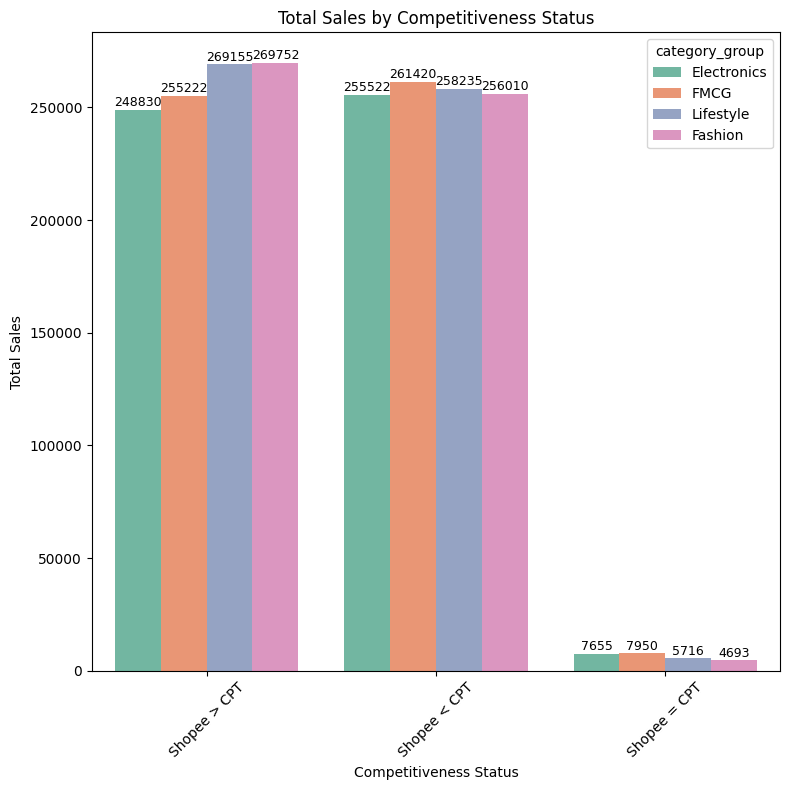

In [91]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_order', data=df_pricing,
                 estimator=sum, ci=None, hue='category_group', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Competitiveness Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Competitiveness Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\richi\AppData\Local\Temp\ipykernel_20528\388676652.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_gmv_usd', data=df_pricing,
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

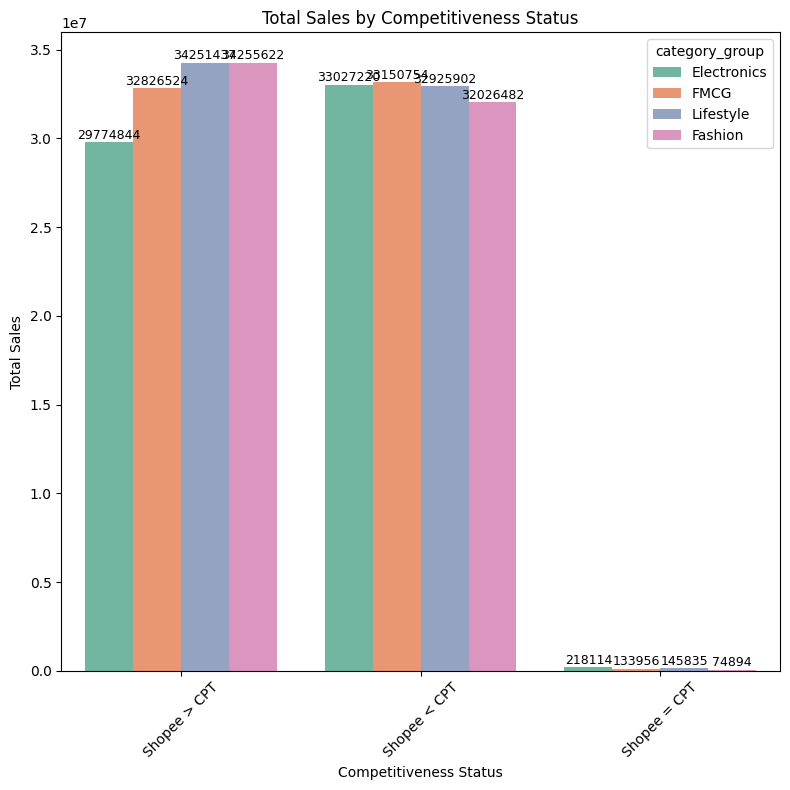

In [92]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_gmv_usd', data=df_pricing,
                 estimator=sum, ci=None, hue='category_group', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Competitiveness Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Competitiveness Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

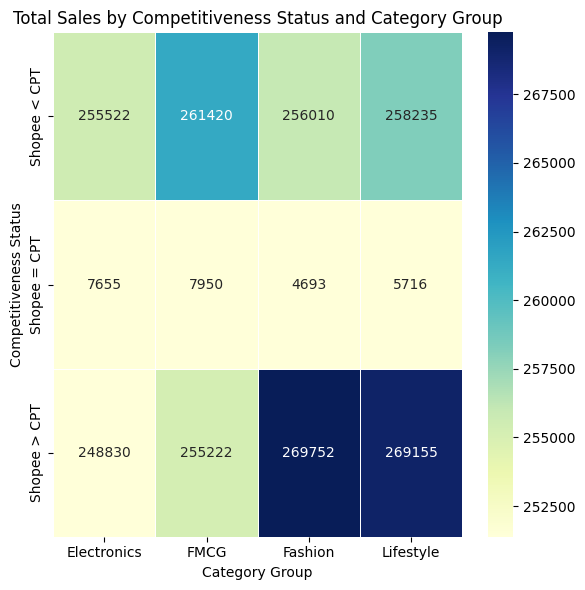

In [107]:
heatmap_data = df_pricing.pivot_table(index='shopee_model_competitiveness_status', columns='category_group',
                                     values='shopee_order', aggfunc='sum')

# Creating a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, vmin=np.nanpercentile(heatmap_data.values, 40), vmax=np.nanpercentile(heatmap_data.values, 100))
plt.xlabel('Category Group')
plt.ylabel('Competitiveness Status')
plt.title('Total Sales by Competitiveness Status and Category Group')
plt.tight_layout()
plt.show()

In [118]:
heatmap_data

category_group,Electronics,FMCG,Fashion,Lifestyle
shopee_model_competitiveness_status,,,,
Shopee < CPT,1.506607e+07,1.302944e+07,1.233887e+07,1.377643e+07
Shopee > CPT,1.135133e+07,1.284330e+07,1.339676e+07,1.409886e+07


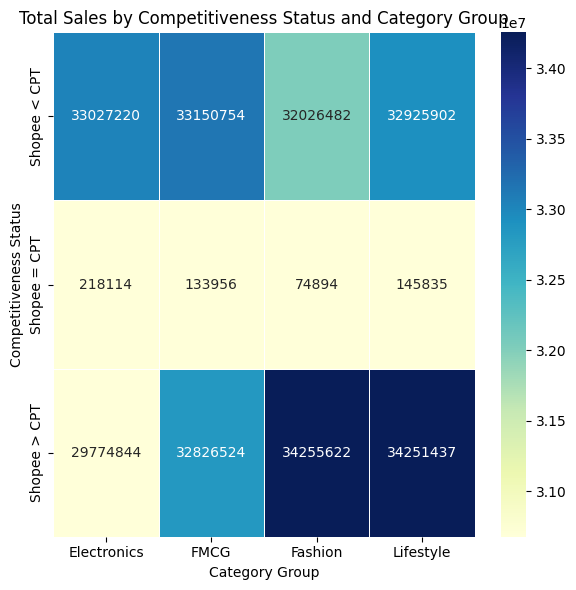

In [106]:
heatmap_data = df_pricing.pivot_table(index='shopee_model_competitiveness_status', columns='category_group',
                                     values='shopee_gmv_usd', aggfunc='sum')

# Creating a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, vmin=np.nanpercentile(heatmap_data.values, 40), vmax=np.nanpercentile(heatmap_data.values, 100))
plt.xlabel('Category Group')
plt.ylabel('Competitiveness Status')
plt.title('Total Sales by Competitiveness Status and Category Group')
plt.tight_layout()
plt.show()

In [109]:
df_pricing.sort_values('shopee_gmv_usd', ascending=False).head(10).to_clipboard()

## Region: ID

C:\Users\richi\AppData\Local\Temp\ipykernel_20528\522588922.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_order', data=df_pricing[df_pricing['grass_region']=='ID'],
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

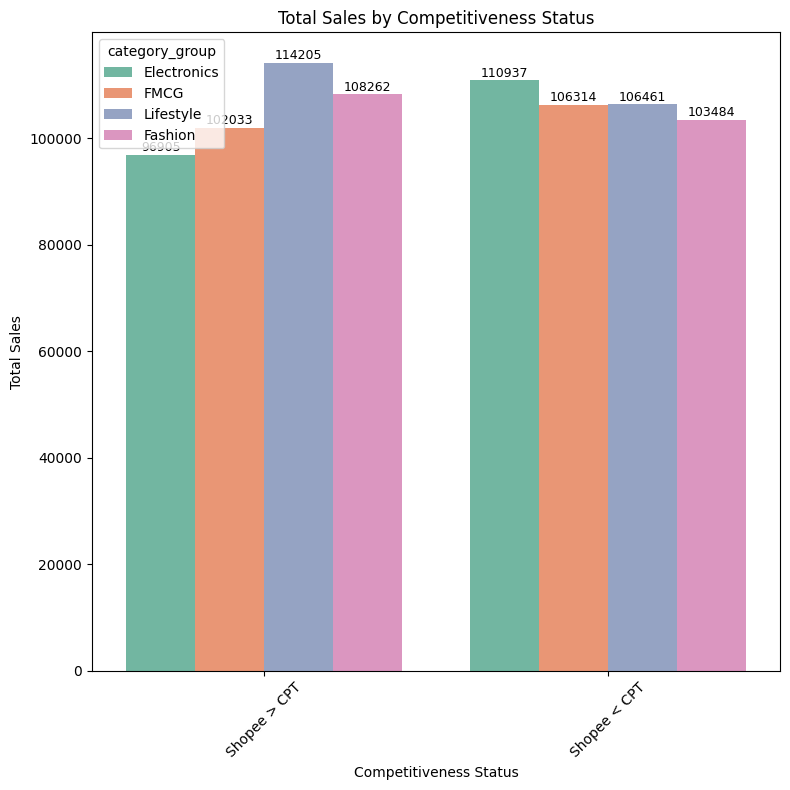

In [110]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_order', data=df_pricing[df_pricing['grass_region']=='ID'],
                 estimator=sum, ci=None, hue='category_group', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Competitiveness Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Competitiveness Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\richi\AppData\Local\Temp\ipykernel_20528\1212390096.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_gmv_usd', data=df_pricing[df_pricing['grass_region']=='ID'],
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\richi\miniconda3\envs\datasci-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

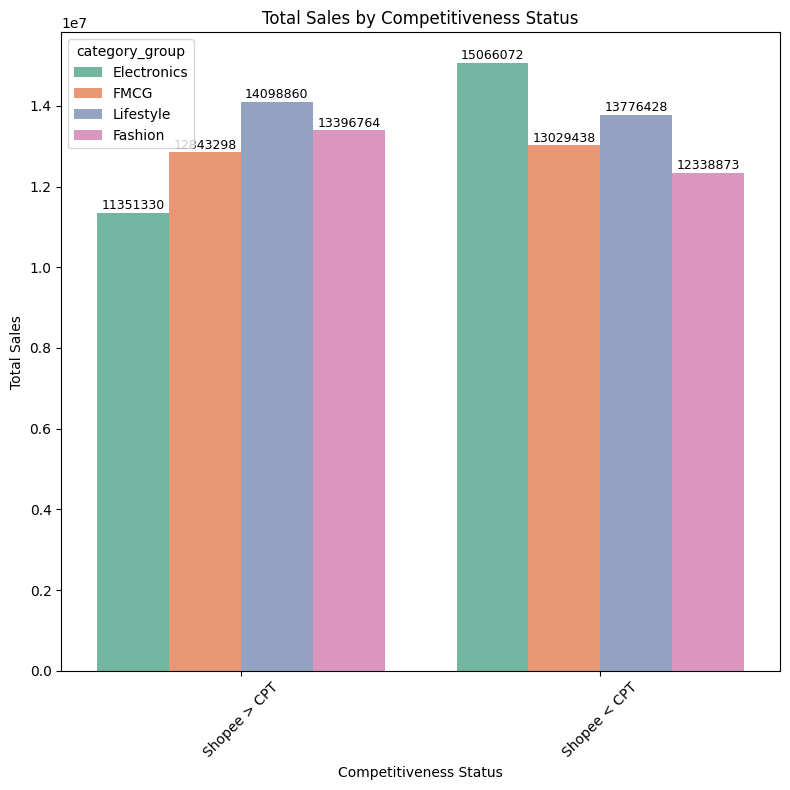

In [111]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='shopee_model_competitiveness_status', y='shopee_gmv_usd', data=df_pricing[df_pricing['grass_region']=='ID'],
                 estimator=sum, ci=None, hue='category_group', palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Competitiveness Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Competitiveness Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

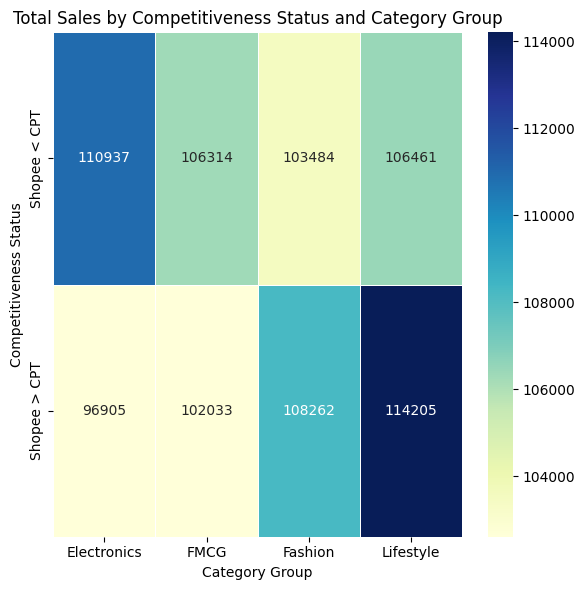

In [114]:
heatmap_data = df_pricing[df_pricing['grass_region']=='ID'].pivot_table(index='shopee_model_competitiveness_status', columns='category_group',
                                     values='shopee_order', aggfunc='sum')

# Creating a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, vmin=np.nanpercentile(heatmap_data.values, 20), vmax=np.nanpercentile(heatmap_data.values, 100))
plt.xlabel('Category Group')
plt.ylabel('Competitiveness Status')
plt.title('Total Sales by Competitiveness Status and Category Group')
plt.tight_layout()
plt.show()

In [117]:
heatmap_data

category_group,Electronics,FMCG,Fashion,Lifestyle
shopee_model_competitiveness_status,,,,
Shopee < CPT,1.506607e+07,1.302944e+07,1.233887e+07,1.377643e+07
Shopee > CPT,1.135133e+07,1.284330e+07,1.339676e+07,1.409886e+07


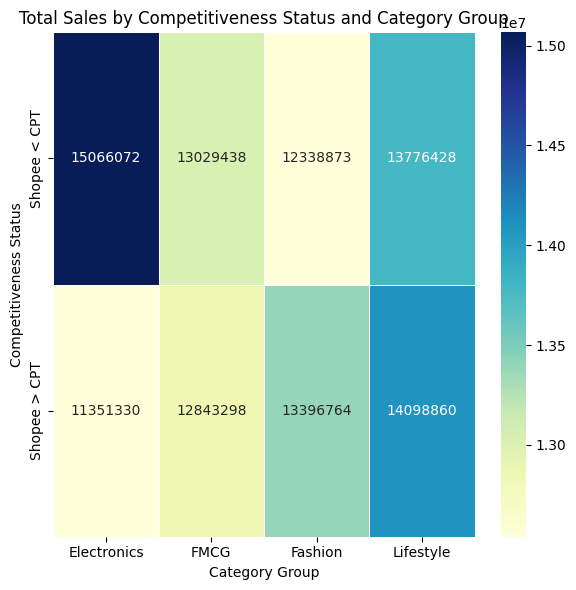

In [115]:
heatmap_data = df_pricing[df_pricing['grass_region']=='ID'].pivot_table(index='shopee_model_competitiveness_status', columns='category_group',
                                     values='shopee_gmv_usd', aggfunc='sum')

# Creating a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, vmin=np.nanpercentile(heatmap_data.values, 20), vmax=np.nanpercentile(heatmap_data.values, 100))
plt.xlabel('Category Group')
plt.ylabel('Competitiveness Status')
plt.title('Total Sales by Competitiveness Status and Category Group')
plt.tight_layout()
plt.show()

In [116]:
df_pricing[df_pricing['grass_region']=='ID'].sort_values('shopee_gmv_usd', ascending=False).head(10).to_clipboard()